## Import Required Libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

## Load And Display Dataset

In [186]:
Data = pd.read_csv("bank.csv", delimiter=';')

In [187]:
Data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [188]:
Data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


## Evaluation of Dataset

In [189]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [190]:
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [191]:
Data.shape

(4521, 17)

In [192]:
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [193]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Exploratory Data Analysis

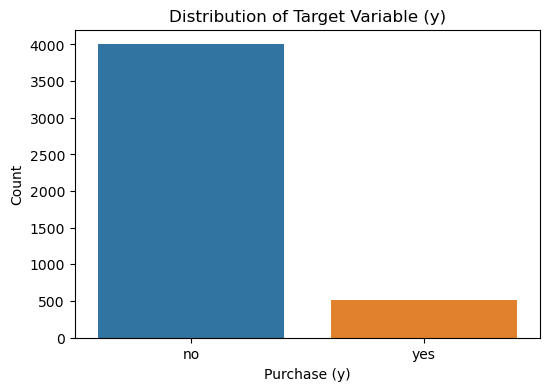

In [194]:
# Distribution of the Target Variable (y)

plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=Data)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Purchase (y)')
plt.ylabel('Count')
plt.show()

# Zero(0) mean no and One(1) mean yes

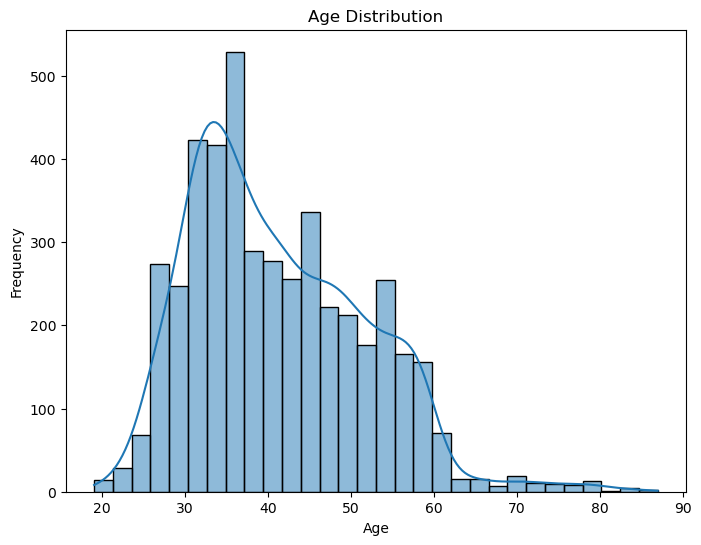

In [195]:
# Distribution of age

plt.figure(figsize=(8, 6))
sns.histplot(Data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# It is observed that majority of the age groups are youthful

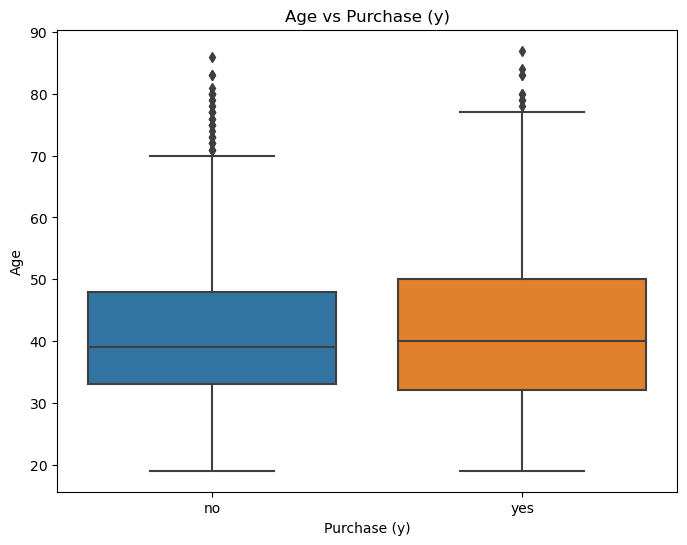

In [196]:
# Age Distribution and Its Relation to the Target

plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=Data)
plt.title('Age vs Purchase (y)')
plt.xlabel('Purchase (y)')
plt.ylabel('Age')
plt.show()

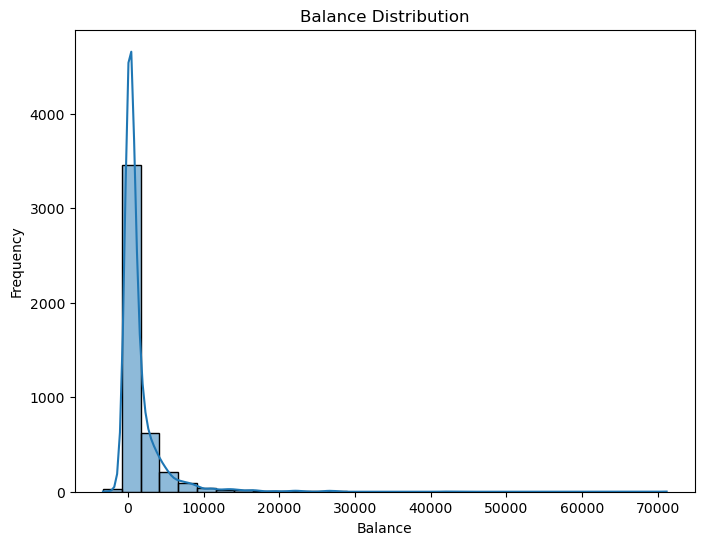

In [197]:
# Distribution of balance
plt.figure(figsize=(8, 6))
sns.histplot(Data['balance'], kde=True, bins=30)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

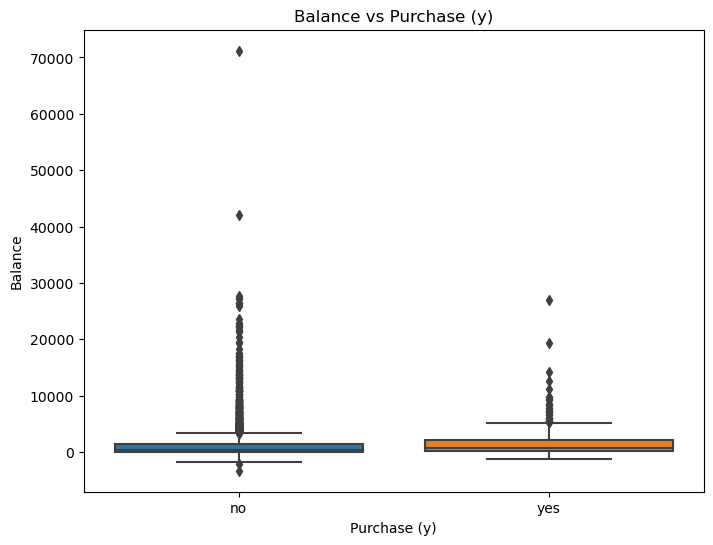

In [198]:
# Balance vs Target Variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='balance', data=Data)
plt.title('Balance vs Purchase (y)')
plt.xlabel('Purchase (y)')
plt.ylabel('Balance')
plt.show()

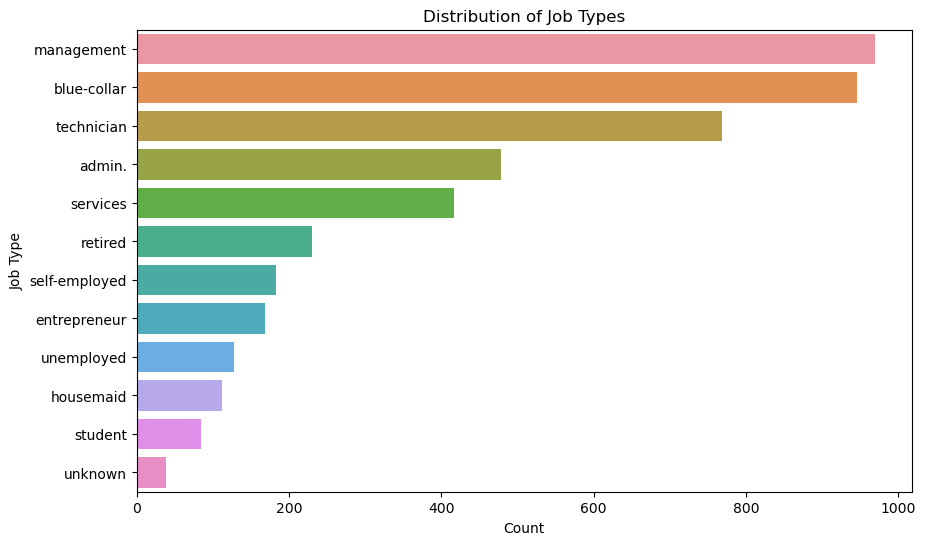

In [199]:
# Job type distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=Data, order=Data['job'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

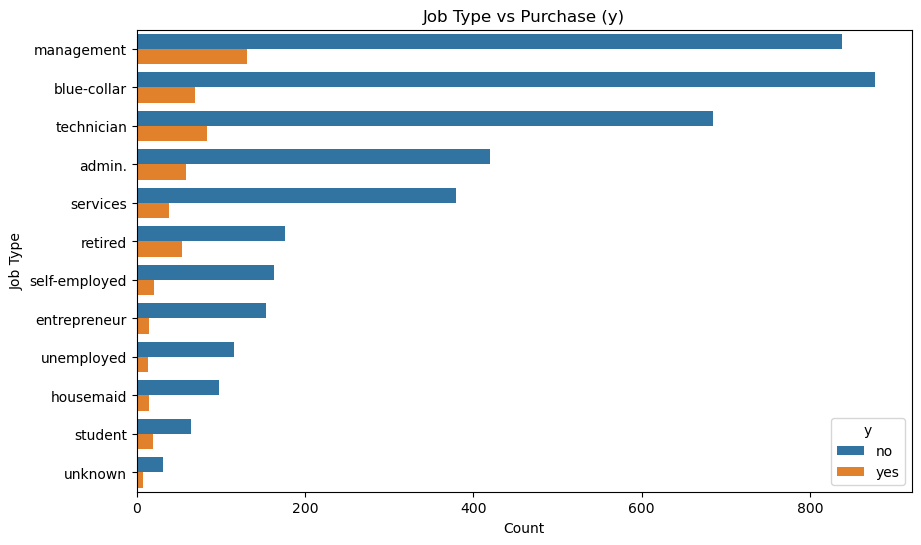

In [200]:
# Job vs Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(y='job', hue='y', data=Data, order=Data['job'].value_counts().index)
plt.title('Job Type vs Purchase (y)')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

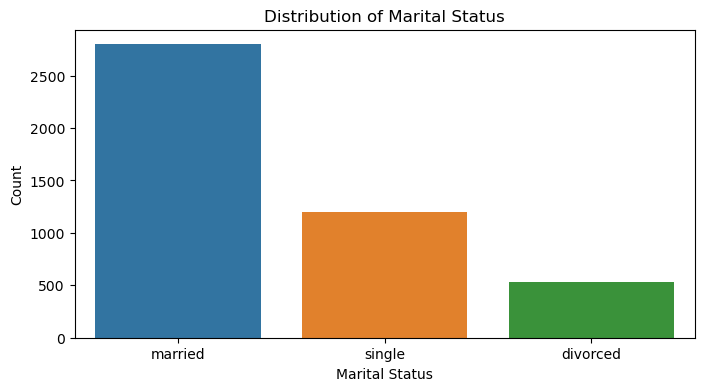

In [201]:
# Marital status distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='marital', data=Data)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

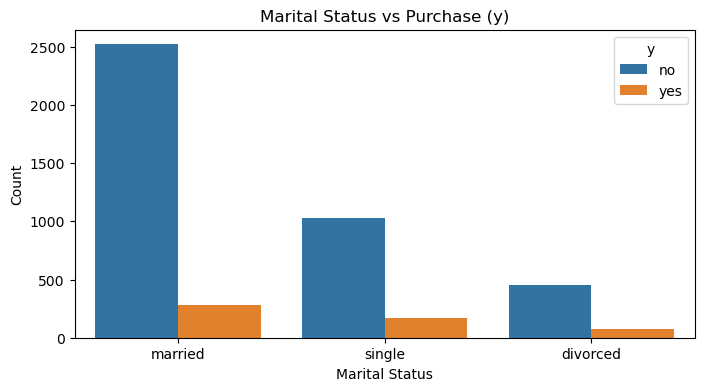

In [202]:
# Marital Status vs Target Variable
plt.figure(figsize=(8, 4))
sns.countplot(x='marital', hue='y', data=Data)
plt.title('Marital Status vs Purchase (y)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

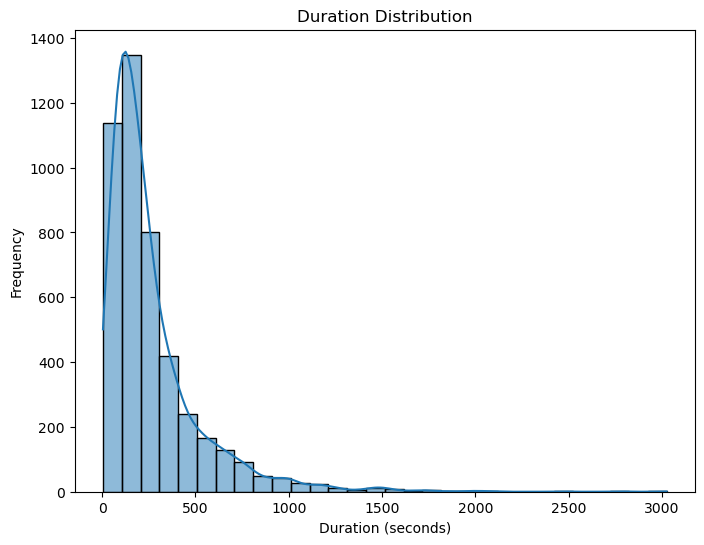

In [203]:
# Distribution of duration
plt.figure(figsize=(8, 6))
sns.histplot(Data['duration'], kde=True, bins=30)
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

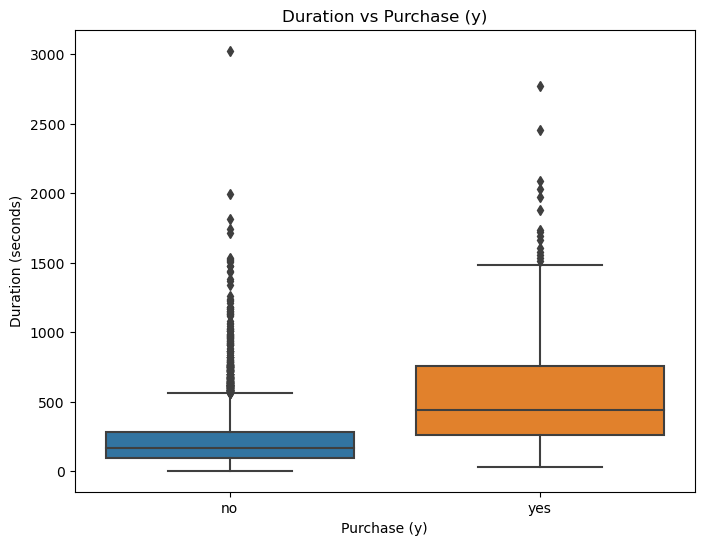

In [204]:
# Duration vs Target Variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=Data)
plt.title('Duration vs Purchase (y)')
plt.xlabel('Purchase (y)')
plt.ylabel('Duration (seconds)')
plt.show()

## Preprocess the Dataset

In [205]:
# Encoding categorical variables using LabelEncoder
label_encoders = {}
for column in Data.select_dtypes(include=['object']).columns:
    labelEncoder = LabelEncoder()
    Data[column] = labelEncoder.fit_transform(Data[column])
    label_encoders[column] = labelEncoder

In [206]:
Data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


## Splitting the Dataset

In [207]:
X = Data.drop(columns=['y'])
y = Data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3164, 16) (1357, 16) (3164,) (1357,)


## Building the Decision Tree Model

In [208]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8614591009579956
Confusion Matrix:
 [[1110   95]
 [  93   59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



## Visualize the Decision Tree

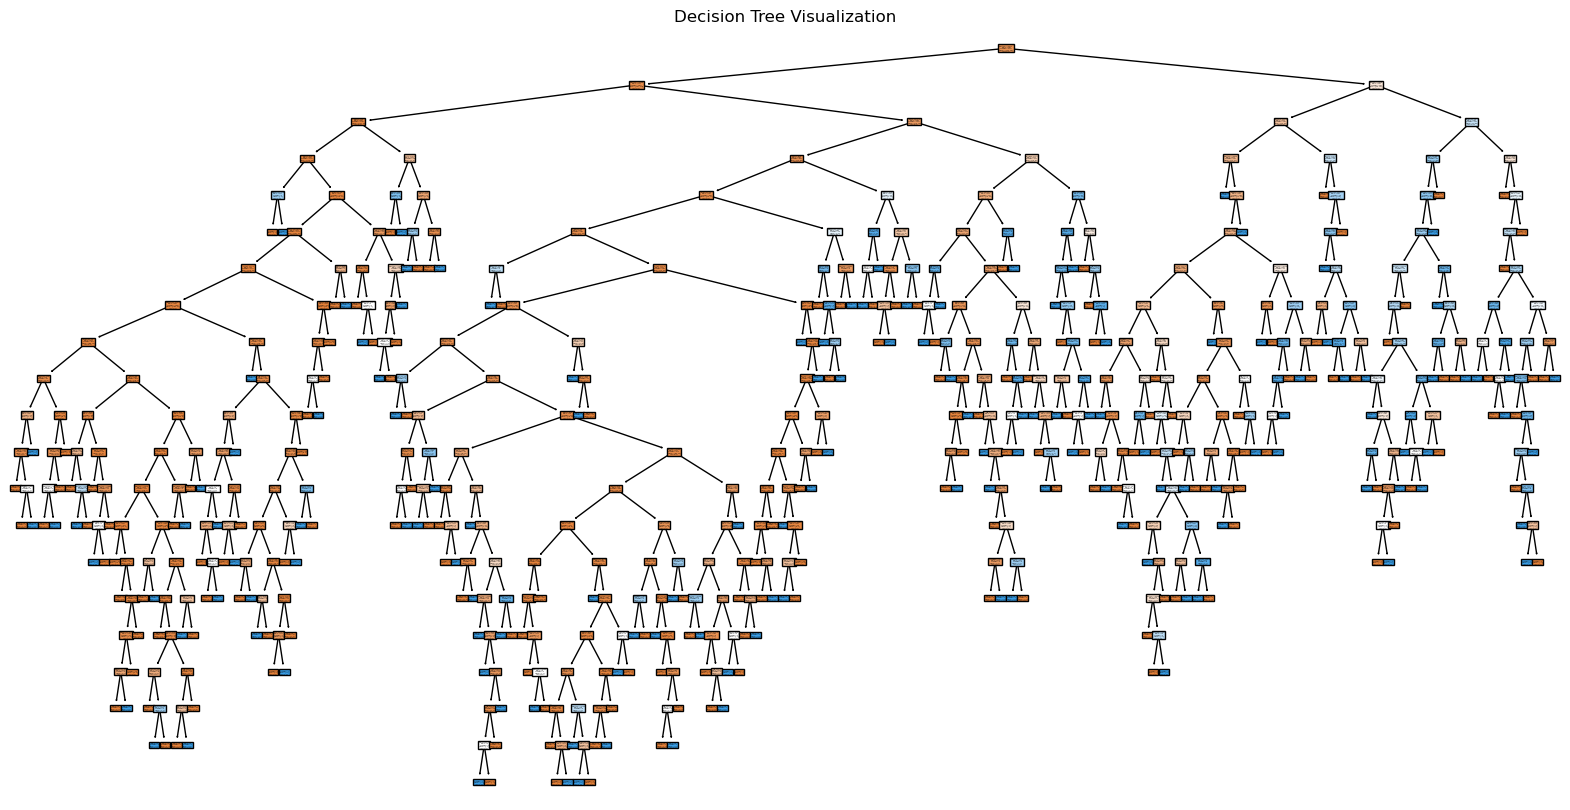

In [209]:
# Convert X.columns to a list
feature_names = list(X.columns)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

## Feature Importance

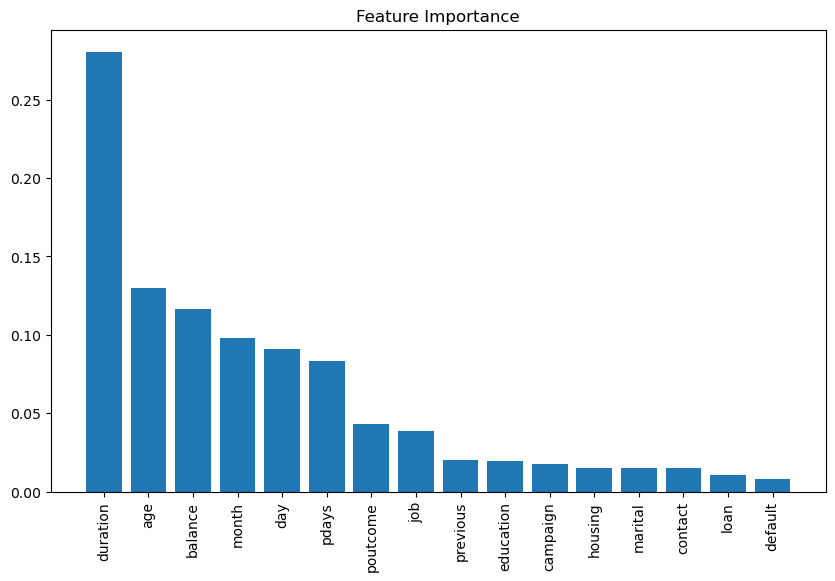

In [210]:
# The code visualizes the importance of each feature in this decision tree model. 
# Feature importance is the measure of how much each feature contributes to the prediction made by the model


# Plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the decision tree
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [211]:
# Define parameters for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
